In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
import numpy as np
import pandas as pd

Using TensorFlow backend.
/home/e530toadwei/.conda/envs/tensorflow_gpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
import matplotlib.pyplot as plt
def plot_image_lables_prediction(images,lables,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25 :num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap="binary")
        title = "label="+str(lables[idx])
        if len(prediction)>0:
            title +=",prediction="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])

        idx+=1
    plt.show()

In [3]:
def load_data():
    (x_train,y_train),(x_test,y_test)=mnist.load_data()
    x_train=x_train.reshape(x_train.shape[0],28,28,1).astype("float32")
    x_test=x_test.reshape(x_test.shape[0],28,28,1).astype("float32")
    x_train=x_train/255
    x_test=x_test/255
    y_train=np_utils.to_categorical(y_train,10)
    y_test=np_utils.to_categorical(y_test,10)
    return (x_train,y_train),(x_test,y_test)

In [4]:
(x_train,y_train),(x_test,y_test)=load_data()

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
y_train[1]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [7]:
modle=Sequential()

In [8]:
modle.add(Conv2D(filters=16,kernel_size=(5,5),padding="same",input_shape=(28,28,1),activation="relu"))

In [9]:
modle.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
modle.add(Conv2D(filters=36,kernel_size=(5,5),padding="same",input_shape=(28,28,1),activation="relu"))

In [11]:
modle.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
modle.add(Dropout(0.25))

In [13]:
modle.add(Flatten())

In [14]:
modle.add(Dense(units=128,activation="relu"))

In [15]:
modle.add(Dropout(0.5))

In [16]:
modle.add(Dense(units=10,activation="relu"))

In [17]:
print(modle.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [18]:
modle.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [19]:
result=modle.fit(x_train,y_train,epochs=25,batch_size=300,verbose=2,validation_split=0.2,)

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
 - 2s - loss: 2.0073 - acc: 0.4383 - val_loss: 0.8876 - val_acc: 0.8386
Epoch 2/25
 - 1s - loss: 1.2106 - acc: 0.7471 - val_loss: 1.3240 - val_acc: 0.8497
Epoch 3/25
 - 1s - loss: 1.4483 - acc: 0.7056 - val_loss: 0.8908 - val_acc: 0.7794
Epoch 4/25
 - 1s - loss: 0.9740 - acc: 0.8052 - val_loss: 0.4458 - val_acc: 0.9357
Epoch 5/25
 - 1s - loss: 0.7118 - acc: 0.8777 - val_loss: 0.3483 - val_acc: 0.9460
Epoch 6/25
 - 1s - loss: 0.7622 - acc: 0.8497 - val_loss: 0.3960 - val_acc: 0.9410
Epoch 7/25
 - 1s - loss: 0.6475 - acc: 0.8857 - val_loss: 0.3126 - val_acc: 0.9544
Epoch 8/25
 - 1s - loss: 0.5599 - acc: 0.9109 - val_loss: 0.2824 - val_acc: 0.9569
Epoch 9/25
 - 1s - loss: 0.6763 - acc: 0.8851 - val_loss: 0.3427 - val_acc: 0.9347
Epoch 10/25
 - 1s - loss: 0.6044 - acc: 0.8926 - val_loss: 0.2649 - val_acc: 0.9509
Epoch 11/25
 - 1s - loss: 0.5361 - acc: 0.9116 - val_loss: 0.2313 - val_acc: 0.9625
Epoch 12/25
 - 1s - loss: 0.4299 - 

In [20]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

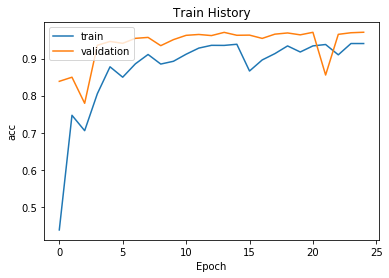

In [21]:
show_train_history(result,'acc','val_acc')

In [22]:
scores=modle.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 30us/step


In [23]:
prediction = modle.predict_classes(x_test)

10000/10000 [==============================] - 0s 25us/step


In [26]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [28]:
df = pd.DataFrame({'lable':y_test,"prediction":prediction})

In [24]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [29]:
pd.crosstab(y_test,prediction,rownames=["lable"],colnames=["predict"])

predict,0,1,2,3,4,5,6,7,8,9
lable,,,,,,,,,,
0,966,0,1,0,0,0,8,2,3,0
1,2,1118,4,1,1,0,5,0,4,0
2,5,1,994,9,1,0,2,13,6,1
3,0,0,3,981,0,10,0,9,7,0
4,0,0,3,0,960,0,4,3,2,10
5,2,0,0,7,0,870,10,2,1,0
6,5,2,0,0,2,2,946,0,1,0
7,1,4,17,2,2,0,0,998,2,2
8,8,1,3,4,3,5,10,7,927,6


In [31]:
df[(df.lable==7)&(df.prediction==2)]

,lable,prediction
1119,7,2
1206,7,2
1226,7,2
1283,7,2
1754,7,2
2016,7,2
2325,7,2
3767,7,2
4433,7,2
4690,7,2


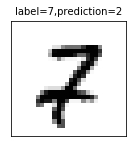

In [32]:
plot_image_lables_prediction(x_test,y_test,prediction,idx=9036,num=1)